In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [42]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [64]:
dfeval = pd.read_csv('test.csv', sep = ',')
dfeval.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,25.977310,1.617817,104.950776,yes,yes,3.0,3.0,Sometimes,no,1.716590,no,0.001272,0.545993,Sometimes,Public_Transportation,Obesity_Type_III
1,Female,25.955014,1.626449,104.879602,yes,yes,3.0,3.0,Sometimes,no,2.094901,no,0.070890,0.599441,Sometimes,Public_Transportation,Obesity_Type_III
2,Female,25.996716,1.626580,105.037203,yes,yes,3.0,3.0,Sometimes,no,2.347322,no,0.008013,0.503896,Sometimes,Public_Transportation,Obesity_Type_III
3,Female,25.992348,1.606474,104.954291,yes,yes,3.0,3.0,Sometimes,no,2.331123,no,0.063383,0.561661,Sometimes,Public_Transportation,Obesity_Type_III
4,Female,25.974446,1.628855,108.090006,yes,yes,3.0,3.0,Sometimes,no,1.757105,no,0.085119,0.465444,Sometimes,Public_Transportation,Obesity_Type_III


In [44]:
df_features = df.copy()
df_labels = df_features.pop('NObeyesdad')

In [46]:
lb = LabelEncoder()
df_labels = lb.fit_transform(df_labels)

In [47]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add_1')>

In [48]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [49]:
inputs = {}

for name, column in df_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'Gender': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Gender')>,
 'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'Height': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Height')>,
 'Weight': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Weight')>,
 'family_history_with_overweight': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'family_history_with_overweight')>,
 'FAVC': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'FAVC')>,
 'FCVC': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'FCVC')>,
 'NCP': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'NCP')>,
 'CAEC': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'CAEC')>,
 'SMOKE': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'SMOKE')>,
 'CH2O': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'CH2O')>,
 'SCC': <KerasTensor: shape=(None, 1) dtype=string (

In [50]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(df[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'normalization_4')>

In [51]:
preprocessed_inputs = [all_numeric_inputs]

In [52]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(df_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

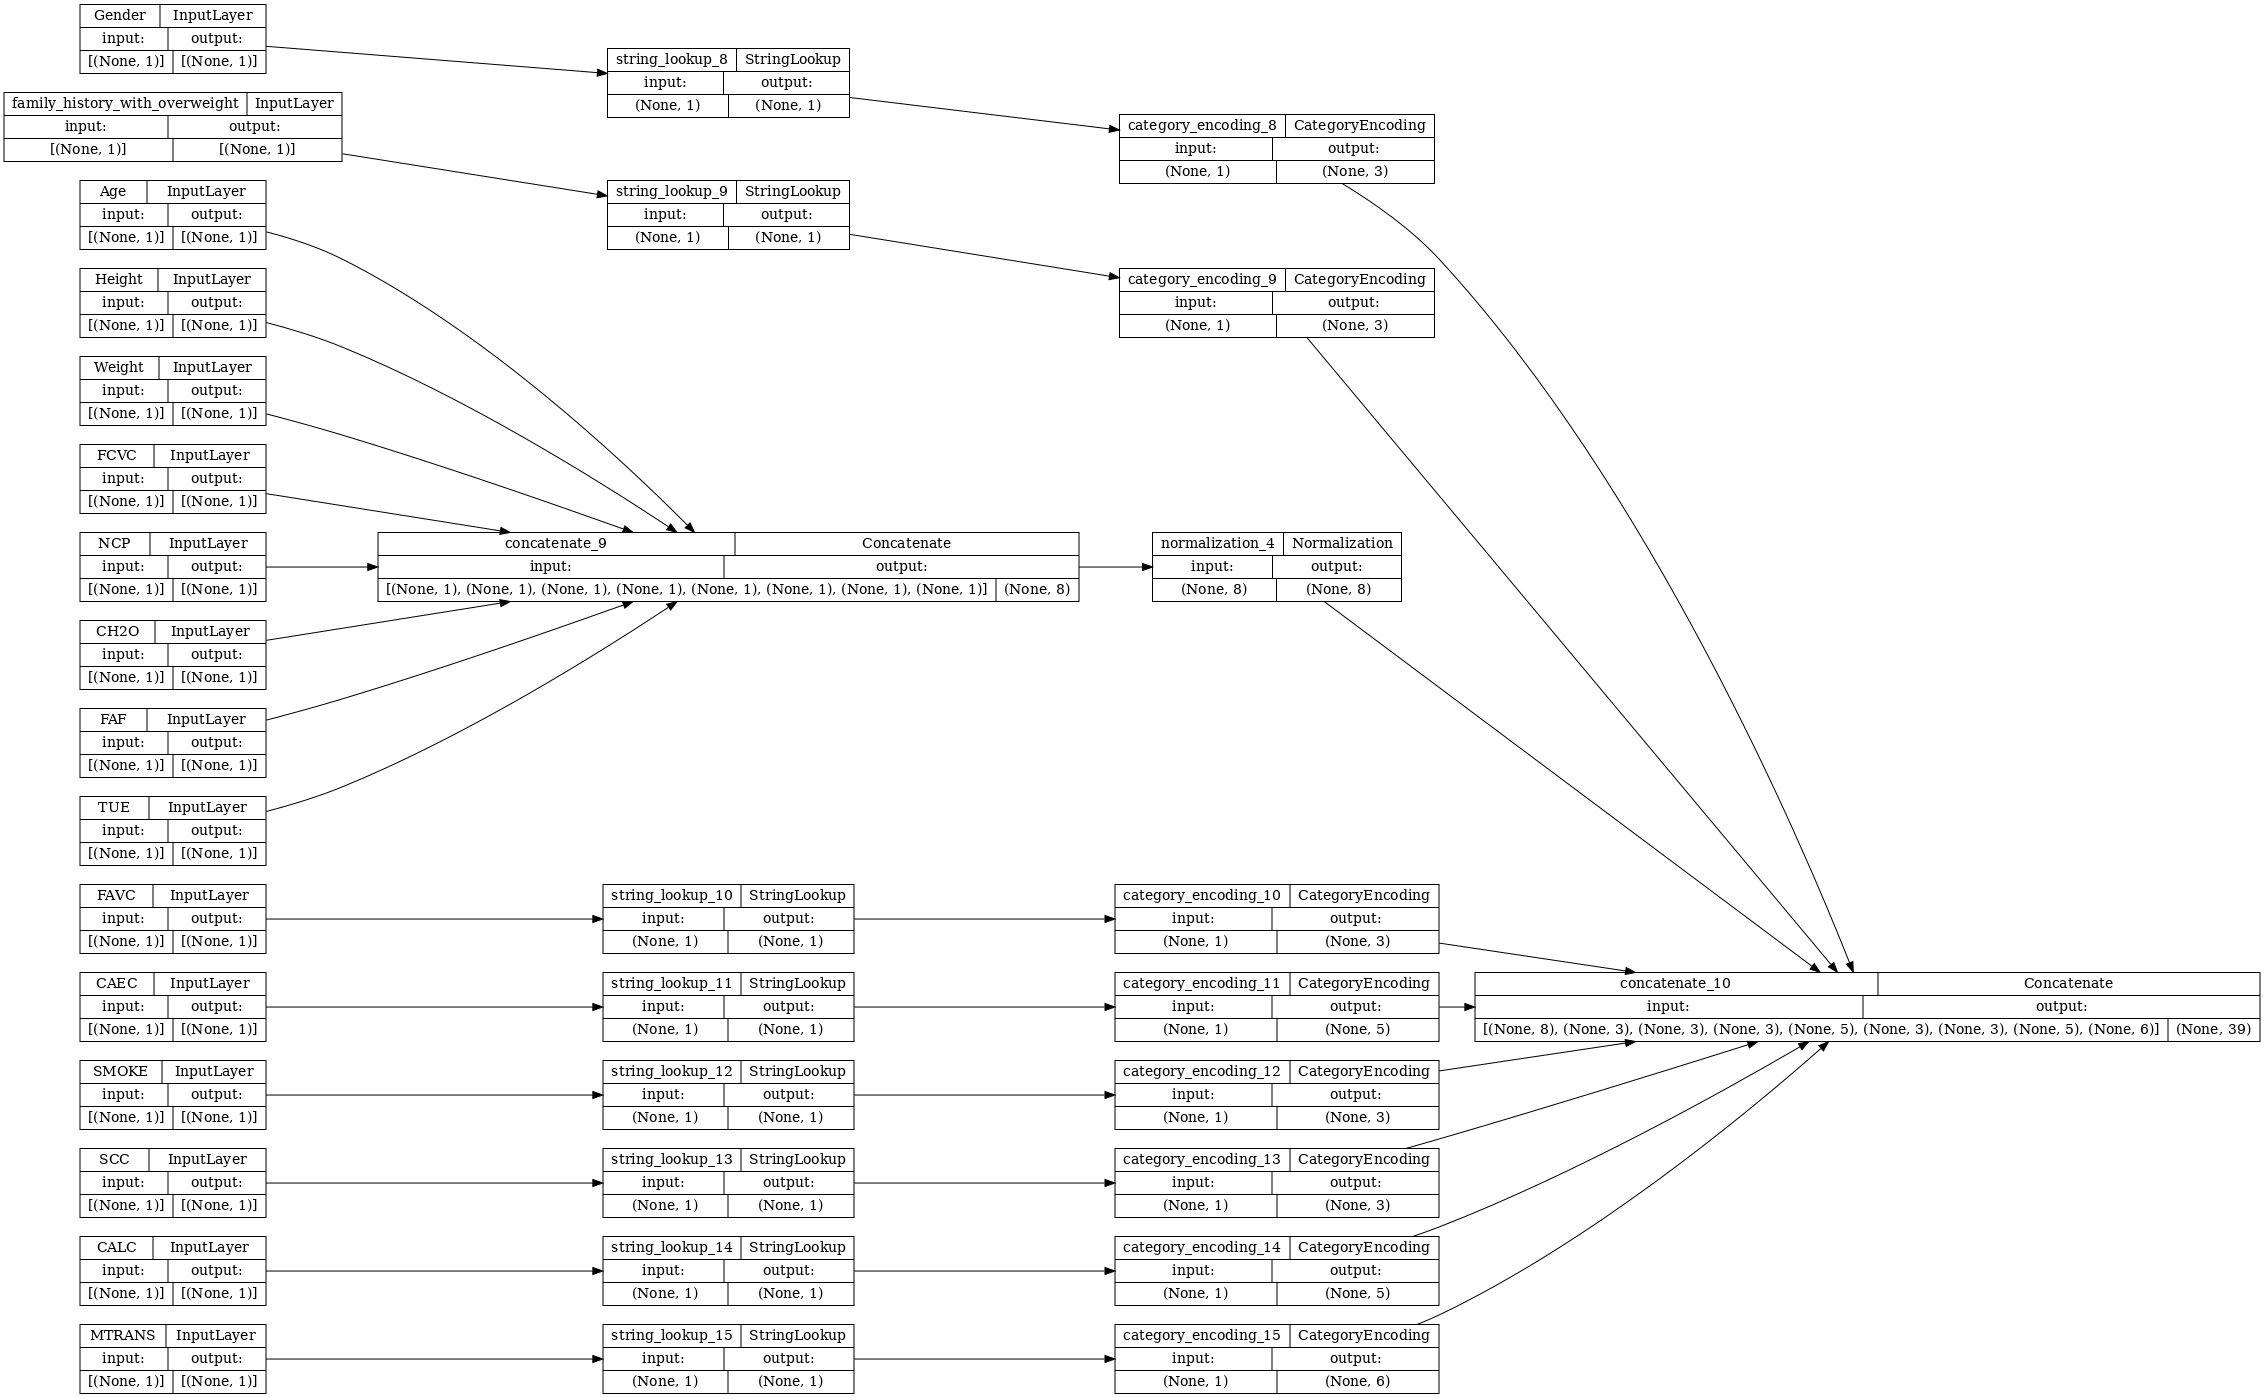

In [53]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

df_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = df_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df_labels, test_size = 0.8)

In [85]:
df_features_dict = {name: np.array(value) 
                         for name, value in x_train.items()}
df_features_dict

{'Gender': array(['Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
        'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
        'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
        'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
        'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
        'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
        'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
        'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
        'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
        'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
        'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
        'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
        'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',
        'Male', 'Male', 'Male', 'Male', 'Female', 

In [86]:
features_dict = {name:values[:1] for name, values in df_features_dict.items()}
df_preprocessing(features_dict)

<tf.Tensor: shape=(1, 39), dtype=float32, numpy=
array([[ 1.372,  0.325, -0.087, -0.785,  0.404,  0.323,  0.333, -1.081,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ]],
      dtype=float32)>

In [56]:
def obesity_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

obesity_model = obesity_model(df_preprocessing, inputs)

In [87]:
obesity_model.fit(x=df_features_dict, y=y_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 0s 4ms/step - loss: -1320.9418
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: -1378.5215
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: -1434.3071
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: -1493.4532
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: -1552.4426
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: -1612.3013
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: -1673.5023
Epoch 8/10
14/14 [==============================] - 0s 5ms/step - loss: -1734.8453
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: -1797.1547
Epoch 10/10
14/14 [==============================] - 0s 6ms/step - loss: -1864.2305


In [90]:
df_features_dict_eval = {name: np.array(value) 
                         for name, value in x_test.items()}
df_features_dict_eval

{'Gender': array(['Male', 'Female', 'Female', ..., 'Male', 'Male', 'Male'],
       dtype=object),
 'Age': array([31.335, 25.909, 21.   , ..., 34.433, 19.896, 31.19 ]),
 'Height': array([1.666, 1.608, 1.66 , ..., 1.695, 1.807, 1.843]),
 'Weight': array([ 89.739, 102.306,  59.   , ...,  84.451,  85.074, 125.974]),
 'family_history_with_overweight': array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'yes'], dtype=object),
 'FAVC': array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object),
 'FCVC': array([2.274, 3.   , 1.   , ..., 2.13 , 2.802, 2.151]),
 'NCP': array([1.05 , 3.   , 3.   , ..., 2.694, 3.   , 3.   ]),
 'CAEC': array(['Sometimes', 'Sometimes', 'Always', ..., 'Sometimes', 'Sometimes',
        'Sometimes'], dtype=object),
 'SMOKE': array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object),
 'CH2O': array([1.358, 1.031, 2.   , ..., 2.607, 2.735, 1.491]),
 'SCC': array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object),
 'FAF': array([1.482, 0.066, 3.   , ..., 

In [98]:
obesity_model.evaluate(df_features_dict_eval,  y_test, verbose=2)

53/53 - 0s - loss: -1.9185e+03 - 167ms/epoch - 3ms/step


-1918.5303955078125

In [99]:
features_dict_eval = {name:values[:1] for name, values in df_features_dict_eval.items()}
df_preprocessing(features_dict_eval)

<tf.Tensor: shape=(1, 39), dtype=float32, numpy=
array([[ 1.107, -0.385,  0.12 , -0.271, -2.103, -1.06 ,  0.555, -1.081,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ]],
      dtype=float32)>

In [102]:
prediction = obesity_model.predict(features_dict_eval)
print("prediction shape:", prediction)

1/1 [==============================] - 0s 33ms/step
prediction shape: [[1016.002]]
